Condition 3.2: &emsp; $p\cdot q=a^2+b^4$

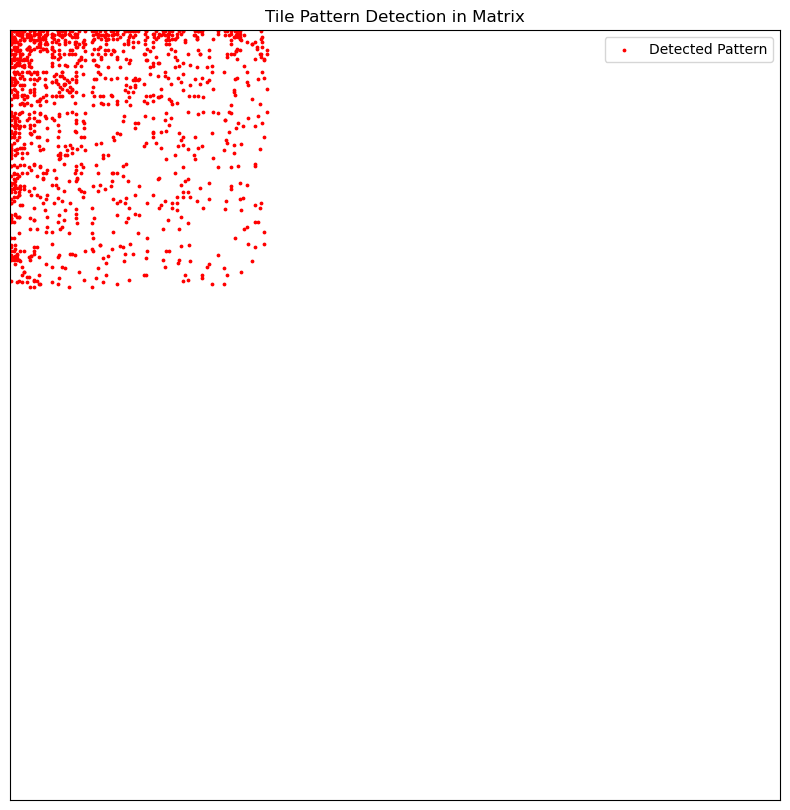

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange

def detect_and_plot_tile_pattern(matrix, p_values, q_values, b_values, threshold=3):
    """
    Detects and plots tile-like patterns in the matrix based on the condition p * q = a^2 + b^4.

    :param matrix: The binary matrix with prime index data.
    :param p_values: List of prime numbers (p) to test.
    :param q_values: List of prime numbers (q) to test.
    :param b_values: List of natural numbers (b) to test.
    :param threshold: Threshold for detecting points near the pattern.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(matrix, interpolation='nearest', cmap="Greys")

    detected_points = []

    # Loop through all prime pairs and b values
    for p in p_values:
        for q in q_values:
            for b in b_values:
                b4 = b ** 4

                # Calculate a^2 values that satisfy the condition
                target_value = p * q - b4
                if target_value > 0:
                    a = int(np.sqrt(target_value))
                    if a ** 2 == target_value:
                        # Find indices in the matrix
                        p_index = p_values.index(p)
                        q_index = q_values.index(q)

                        if p_index < matrix.shape[0] and q_index < matrix.shape[1]:
                            matrix[p_index, q_index] = 1
                            detected_points.append((p_index, q_index))

    # Plot detected points in red
    detected_points = np.array(detected_points)
    if len(detected_points) > 0:
        ax.scatter(detected_points[:, 1], detected_points[:, 0], color="red", s=3, label="Detected Pattern")

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    plt.title("Tile Pattern Detection in Matrix")
    plt.show()


# Beispiel-Daten
primes = list(primerange(3, 7000))
matrix_size = len(primes)
matrix_35 = np.zeros((matrix_size, matrix_size), dtype=int)

# Wähle relevante p und q Werte
p_values = primes[:300]  # Nehmen wir 300 Primzahlen
q_values = primes[:300]  # Nehmen wir 300 Primzahlen
b_values = range(1, 10)  # Teste b-Werte von 1 bis 9

# Plot the Tile Pattern
detect_and_plot_tile_pattern(matrix_35, p_values, q_values, b_values)
